<a href="https://colab.research.google.com/github/Only-Mike/DeepLearning-and-AI/blob/main/Group%20Assigment2/GroupAssignment2%20-%20LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import torch
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [18]:
!git clone 'https://github.com/Only-Mike/DeepLearning-and-AI.git'

fatal: destination path 'DeepLearning-and-AI' already exists and is not an empty directory.


In [15]:
weather_data = pd.read_csv('/content/DeepLearning-and-AI/Group Assigment2/train.csv')


In [16]:
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(stock_data[['store', 'product', 'number_sold']])
data_s = pd.DataFrame(data_scaled, columns=['store', 'product', 'number_sold'])
stock_data = data_s[['number_sold']].to_numpy()

In [6]:
# Split the data into sequences for RNN input
sequence_length = 20
sequence_data = []
sequence_labels = []
for i in range(len(stock_data) - sequence_length):
    sequence_data.append(stock_data[i:i+sequence_length])
    sequence_labels.append(stock_data[i+sequence_length])
sequence_data = np.array(sequence_data)
sequence_labels = np.array(sequence_labels)

train_data = sequence_data[:2000]
train_labels = sequence_labels[:2000]
test_data = sequence_data[2000:]
test_labels = sequence_labels[2000:]

In [7]:
# Split the data into training and testing sets
train_data = TensorDataset(torch.from_numpy(train_data), torch.from_numpy(train_labels))
test_data = TensorDataset(torch.from_numpy(test_data), torch.from_numpy(test_labels))

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

In [8]:
# Initialize the LSTM model
input_size = 1
hidden_size = 6
output_size = 1

# 1. Creating an LSTM model
lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
fc = nn.Linear(hidden_size, output_size)

criterion = nn.MSELoss()
optimizer = optim.SGD(lstm.parameters(), lr=0.01)

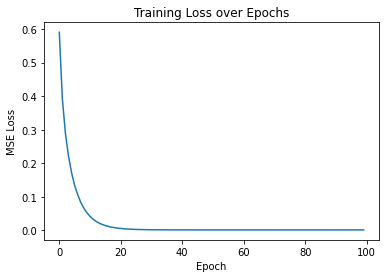

Test MSE: 0.03741147322804816


In [9]:
# Train the lstm model
num_epochs = 100
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    train_loss = 0

    for i, (data, label) in enumerate(train_loader):
        optimizer.zero_grad()

        # Run the forward pass
        hidden = (torch.zeros(1, data.size(0), hidden_size),
                  torch.zeros(1, data.size(0), hidden_size))
        output, hidden = lstm(data.float(), hidden)
        output = fc(hidden[0][-1])

        # 2. Network Evaluation
        loss = criterion(output, label.float())

        # 3. Gradient Calculation
        loss.backward()

        # 4. Back Propagation
        optimizer.step()
        train_loss += loss.item()

    # Calculate the average training loss
    train_loss = train_loss / len(train_loader)
    train_losses.append(train_loss)

# Plot the MSE loss for each epoch
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss over Epochs')
plt.show()

# Evaluate the lstm model
mse = 0

with torch.no_grad():
    for data, label in test_loader:
        hidden = (torch.zeros(1, data.size(0), hidden_size),
                  torch.zeros(1, data.size(0), hidden_size))
        output, hidden = lstm(data.float(), hidden)
        output = fc(hidden[0][-1])

        mse += ((output - label)**2).mean().item()

mse /= len(test_loader)
print('Test MSE: {}'.format(mse))

In [10]:
# Evaluate the LSTM model
mse = 0

#By wrapping the evaluation code in a with torch.no_grad() context, 
#you can avoid unnecessary memory usage and speed up the evaluation process.
with torch.no_grad():
    # Initialize the hidden state and the cell state
    # The hidden state and the cell state reset to zero for every epoch
    hs = torch.zeros(1, hidden_size)
    cs = torch.zeros(1, hidden_size)

    for data, label in test_loader:
        hidden = (hs, cs)
        output, hidden = lstm(data.float(), hidden)
        output = fc(hidden[-1])
        hs = hs.detach()
        cs = cs.detach()
        
        mse += ((output - label)**2).mean().item()

mse /= len(test_loader)
print('Test MSE: {}'.format(mse))

RuntimeError: ignored

In [12]:
# Initialize the hidden state and the cell state
# The hidden state and the cell state reset to zero for every epoch
hs = torch.zeros(1, hidden_size)
cs = torch.zeros(1, hidden_size)
for i, (data, label) in enumerate(test_loader):
    hidden = (hs, cs)
    
    # Run the forward pass
    output, hidden = lstm(data.float(), hidden)
    output = fc(hidden[-1])
    hs = hs.detach()
    cs = cs.detach()
    output_list.append(output.detach().numpy()[0][0])
    
for i, (data, label) in enumerate(train_loader):
    hidden = (hs, cs)

    # Run the forward pass
    output, hidden = lstm(data.float(), hidden)
    output = fc(hidden[-1])
    hs = hs.detach()
    cs = cs.detach()
    output_list.append(output.detach().numpy()[0][0])

RuntimeError: ignored

In [11]:
# train_predict = lstm(X_ss)#forward pass
# data_predict = train_predict.data.numpy() #numpy conversion
dataY_plot = y.Volume.values
# data_predict = output_list

data_predict = mm.inverse_transform([output_list]) #reverse transformation
# dataY_plot = mm.inverse_transform(dataY_plot)
plt.figure(figsize=(10,6)) #plotting
plt.axvline(x=200, c='r', linestyle='--') #size of the training set

plt.plot(dataY_plot, label='Actuall Data') #actual plot
plt.plot(data_predict[0], label='Predicted Data') #predicted plot
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 

NameError: ignored